In [1]:
# importing the relevant libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix, roc_auc_score

In [2]:
file_path = "employee_data.csv"
main_df = pd.read_csv(file_path)

display(main_df)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,quit,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0.0,sales,low
1,0.80,0.86,5,262,6,0,1,0.0,sales,medium
2,0.11,0.88,7,272,4,0,1,0.0,sales,medium
3,0.72,0.87,5,223,5,0,1,0.0,sales,low
4,0.37,0.52,2,159,3,0,1,0.0,sales,low
...,...,...,...,...,...,...,...,...,...,...
11577,0.55,0.78,4,261,3,0,0,0.0,management,high
11578,0.76,0.56,5,222,10,0,0,0.0,management,high
11579,0.53,0.99,3,223,10,0,0,0.0,marketing,low
11580,0.51,0.86,3,182,10,0,0,0.0,sales,low


In [3]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11582 entries, 0 to 11581
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11582 non-null  float64
 1   last_evaluation        11582 non-null  float64
 2   number_project         11582 non-null  int64  
 3   average_montly_hours   11582 non-null  int64  
 4   time_spend_company     11582 non-null  int64  
 5   Work_accident          11582 non-null  int64  
 6   quit                   11582 non-null  int64  
 7   promotion_last_5years  11581 non-null  float64
 8   department             11581 non-null  object 
 9   salary                 11581 non-null  object 
dtypes: float64(3), int64(5), object(2)
memory usage: 905.0+ KB


Data types:


*   satisfaction_level: scale of 0 - 1 (employee satisfaction)
*   last_evaluation: scale of 0 - 1 (employer evaluation)
*   number_project: int (number of projects completed)
*   average_montly_hours: avg hours worked monthly
*   time_spend_compand: years spent in the company
*   work_accident: accidents occuring during work
*   quit: 0 or 1 ('N' 'Y')
*   promotion_last_5years: ??
*   department
*   salary



## **Data visualization**
Analysis of data in the dataset provided.

In [4]:
missing_val = main_df.isnull().any(axis=1)
missing_row = main_df[missing_val]

display(missing_row)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,quit,promotion_last_5years,department,salary
11581,0.57,0.93,2,204,10,0,0,NaN,NaN,NaN


In [5]:
working_df = main_df.dropna()

display(working_df)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,quit,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0.0,sales,low
1,0.80,0.86,5,262,6,0,1,0.0,sales,medium
2,0.11,0.88,7,272,4,0,1,0.0,sales,medium
3,0.72,0.87,5,223,5,0,1,0.0,sales,low
4,0.37,0.52,2,159,3,0,1,0.0,sales,low
...,...,...,...,...,...,...,...,...,...,...
11576,0.97,0.51,5,215,7,0,0,0.0,management,high
11577,0.55,0.78,4,261,3,0,0,0.0,management,high
11578,0.76,0.56,5,222,10,0,0,0.0,management,high
11579,0.53,0.99,3,223,10,0,0,0.0,marketing,low


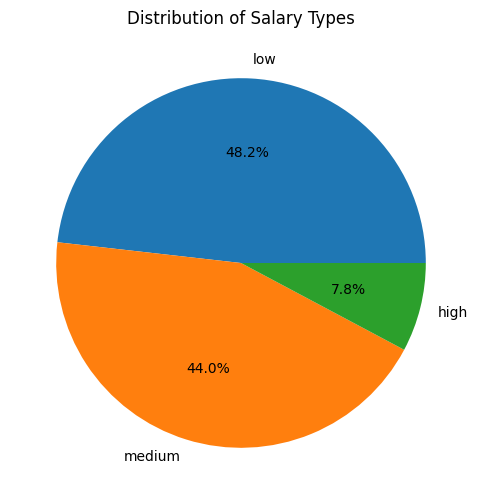

In [6]:
# no. distribution of salary types
plt.figure(figsize=(10,6))
plt.pie(working_df['salary'].value_counts(), labels=working_df['salary'].value_counts().index, autopct='%1.1f%%')
plt.title("Distribution of Salary Types")
plt.show()

9581


,department,N
0,IT,776
1,RandD,603
2,accounting,501
3,hr,488
4,management,313
5,marketing,521
6,product_mng,528
7,sales,2536
8,support,1478
9,technical,1837


C:\Users\Jasmine\AppData\Local\Temp\ipykernel_28532\896979882.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dept_size, x='N', y='department',palette='Set1')


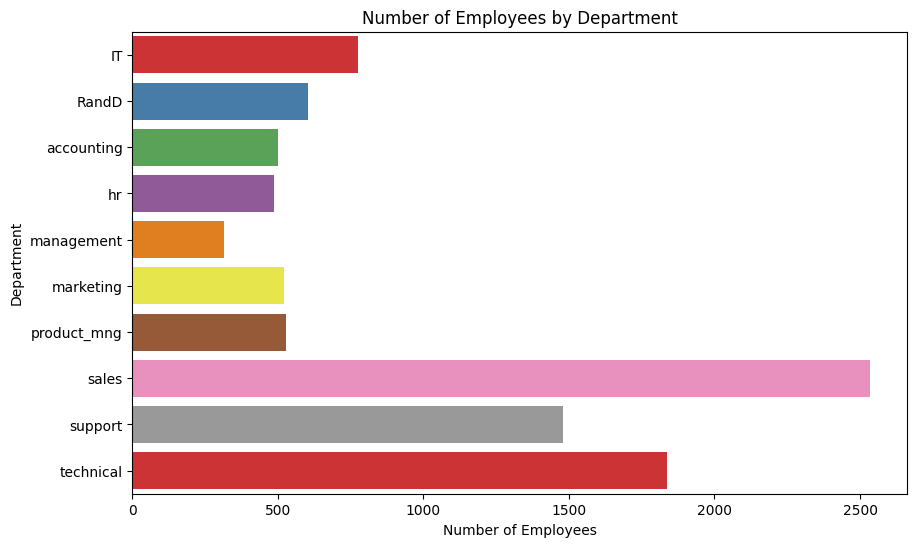

In [7]:
# number of people still in company
curr_comp = working_df[working_df['quit']==0]
print(len(curr_comp))
dept_size = curr_comp.groupby('department').size().reset_index(name="N")

display(dept_size)

plt.figure(figsize=(10,6))
sns.barplot(data=dept_size, x='N', y='department',palette='Set1')
plt.title("Number of Employees by Department")
plt.xlabel("Number of Employees")
plt.ylabel("Department")
plt.show()

2000


,department,N
0,IT,159
1,RandD,86
2,accounting,110
3,hr,113
4,management,52
5,marketing,112
6,product_mng,110
7,sales,556
8,support,312
9,technical,390


C:\Users\Jasmine\AppData\Local\Temp\ipykernel_28532\1524002748.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=left_comp_size, x='N', y='department',palette='Set2')


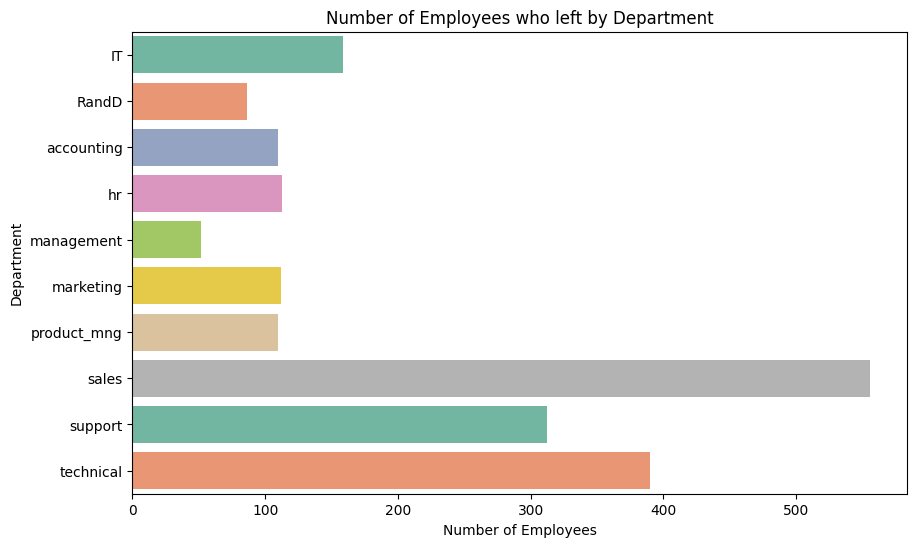

In [8]:
# no. of employees who left each dept
left_comp = working_df[working_df['quit']==1]
print(len(left_comp))
left_comp_size = left_comp.groupby('department').size().reset_index(name="N")

display(left_comp_size)

plt.figure(figsize=(10,6))
sns.barplot(data=left_comp_size, x='N', y='department',palette='Set2')
plt.title("Number of Employees who left by Department")
plt.xlabel("Number of Employees")
plt.ylabel("Department")
plt.show()

In [9]:
# retention rate
overall_ret = (working_df['quit']==0).mean()*100  #gives the percentage

dept_ret = working_df.groupby('department')['quit'].apply(lambda x: (x==0).mean()*100).reset_index(name='dept_retention (%)')

print(f"The average retention rate of the company these few years is {overall_ret}%.")
print(dept_ret)

The average retention rate of the company these few years is 82.73033416803385%.
    department  dept_retention (%)
0           IT           82.994652
1        RandD           87.518142
2   accounting           81.996727
3           hr           81.198003
4   management           85.753425
5    marketing           82.306477
6  product_mng           82.758621
7        sales           82.018111
8      support           82.569832
9    technical           82.487652


Seeing as how the retention rate is relatively constant throughout the different departments, it suggests that the number of people who left the company per department is proportionate to the size of the department.

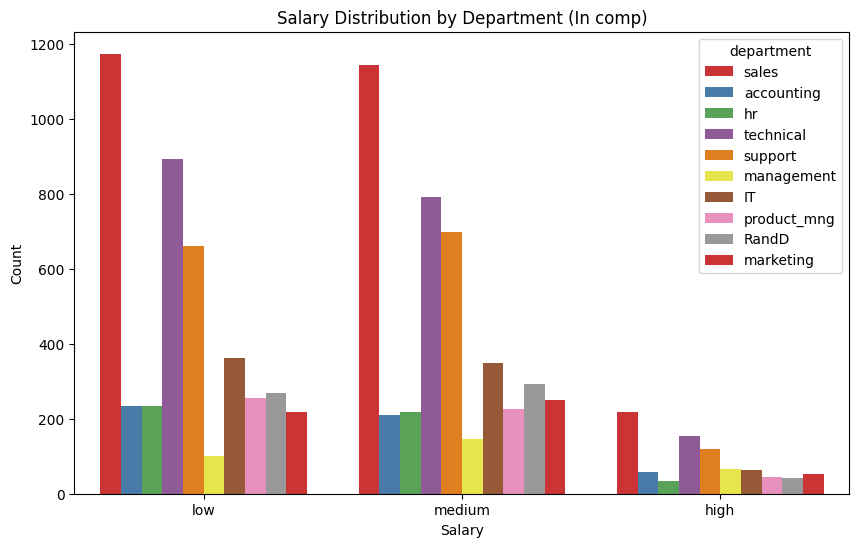

In [10]:
# salary distribution by in company by department
plt.figure(figsize=(10,6))
sns.countplot(data=curr_comp, x='salary', hue='department', palette='Set1')
plt.title("Salary Distribution by Department (In comp)")
plt.xlabel("Salary")
plt.ylabel("Count")
plt.show()

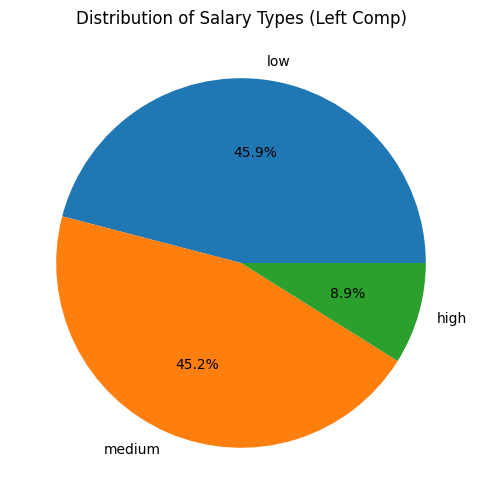

In [11]:
# salary distribution of employees
plt.figure(figsize=(10,6))
plt.pie(curr_comp['salary'].value_counts(), labels=curr_comp['salary'].value_counts().index, autopct='%1.1f%%')
plt.title("Distribution of Salary Types (Left Comp)")
plt.show()

Text(0.5, 0, 'Salary')

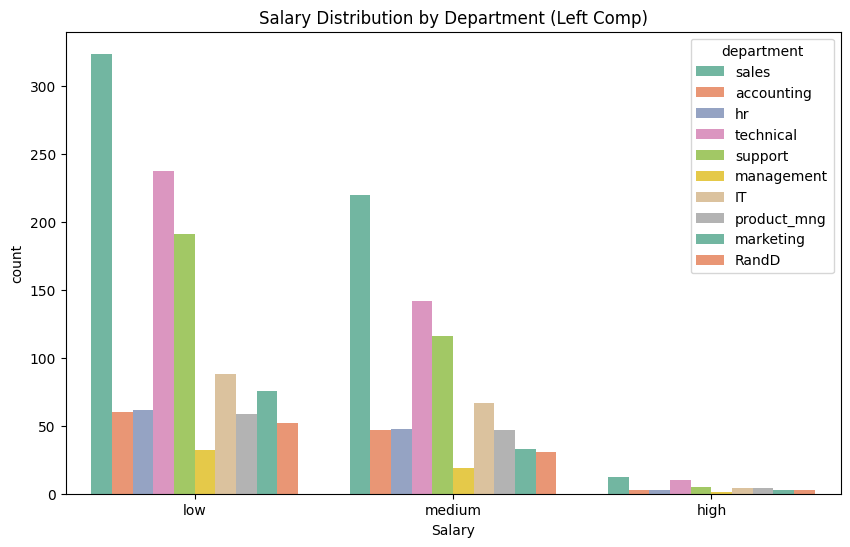

In [12]:
# salary distribution of quitters by department
plt.figure(figsize=(10,6))
sns.countplot(data=left_comp, x='salary', hue='department', palette='Set2')
plt.title("Salary Distribution by Department (Left Comp)")
plt.xlabel("Salary")

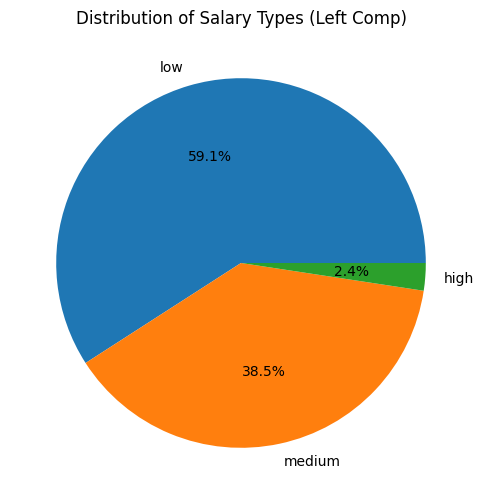

In [13]:
# spread of salary levels amongst those who quie
plt.figure(figsize=(10,6))
plt.pie(left_comp['salary'].value_counts(), labels=left_comp['salary'].value_counts().index, autopct='%1.1f%%')
plt.title("Distribution of Salary Types (Left Comp)")
plt.show()

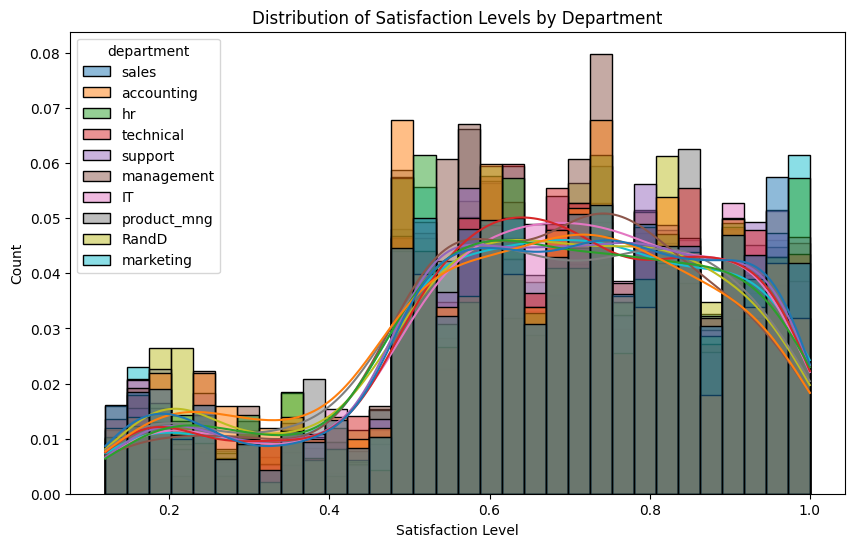

In [14]:
# spread of satisfaction by department
plt.figure(figsize=(10,6))
sns.histplot(data=curr_comp, x='satisfaction_level', kde=True, hue='department',stat='probability', common_norm=False)
plt.title("Distribution of Satisfaction Levels by Department")
plt.xlabel("Satisfaction Level")
plt.ylabel("Count")
plt.show()

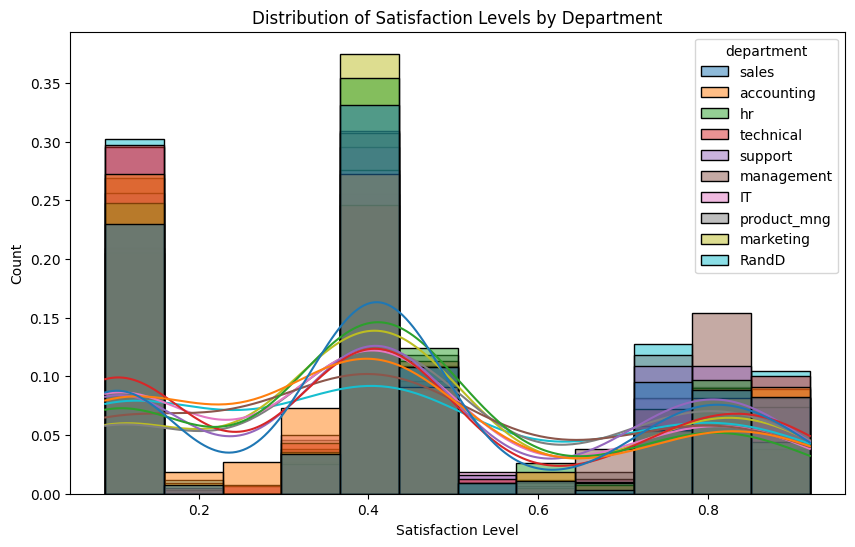

In [15]:
# spread of satisfaction by department of those who left

plt.figure(figsize=(10,6))
sns.histplot(data=left_comp, x='satisfaction_level', kde=True, hue='department',stat='probability',common_norm=False)
plt.title("Distribution of Satisfaction Levels by Department")
plt.xlabel("Satisfaction Level")
plt.ylabel("Count")
plt.show()

From the above 2 graphs, we can understand:


*   a higher percentage of employees who are still employed have satisfaction levels of at least 0.5 and higher
*   in contrast, we see a higher percentage of satisfaction levels of 0.4 and lower in employees who have left the company

This supports the reasoning that, employees may have left the company due to being dissatisfied with their work. However, reasons could range from having disagreements with the management, to the long working hours to not enjoying their current job responsibilities.

The outliers we see from the first graph (those being dissatisfied but still employed) could be due to:

*   high paying job
*   unable to find other jobs
*   repetitive lifestyle due to the role

The outliers we see from the second graph (those having high satisfaction level but still quitting) could be due to:

*   found a higher paying job
*   found a job with better career prospects



C:\Users\Jasmine\AppData\Local\Temp\ipykernel_28532\4161787361.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=working_df, x='time_spend_company', y='satisfaction_level', hue='salary', ci=None)


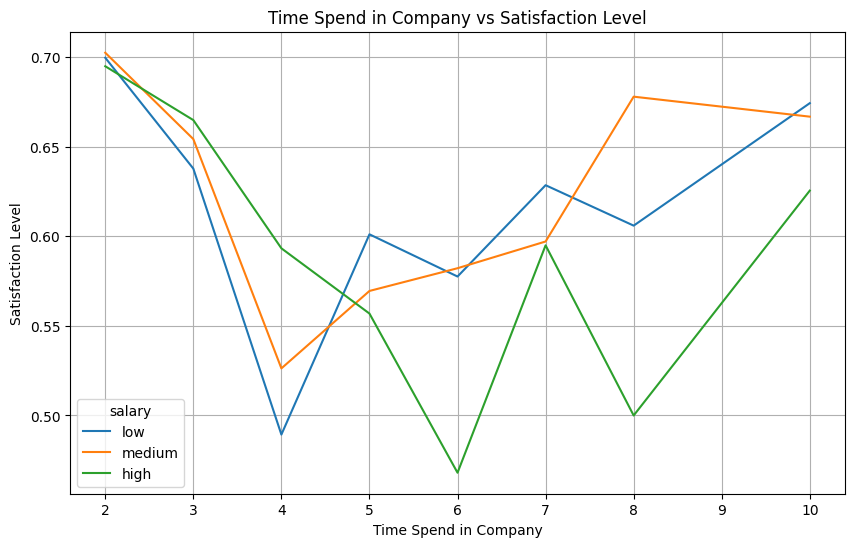

In [16]:
# Time spent in company vs. mean Satisfaction level

plt.figure(figsize=(10,6))
sns.lineplot(data=working_df, x='time_spend_company', y='satisfaction_level', hue='salary', ci=None)
plt.title("Time Spend in Company vs Satisfaction Level")
plt.xlabel("Time Spend in Company")
plt.ylabel("Satisfaction Level")
plt.grid(True)
plt.show()

From the graph we can tell that, there isn't really a corelation between the amount of time spent in the company and the satisfaction level, even when comparing the different salary levels.

This suggests that there are other reasons to why the employees quit / have been made to leave the company.

C:\Users\Jasmine\AppData\Local\Temp\ipykernel_28532\2132741986.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=working_df, x='number_project', y='promotion_last_5years', hue='salary', ci=None)


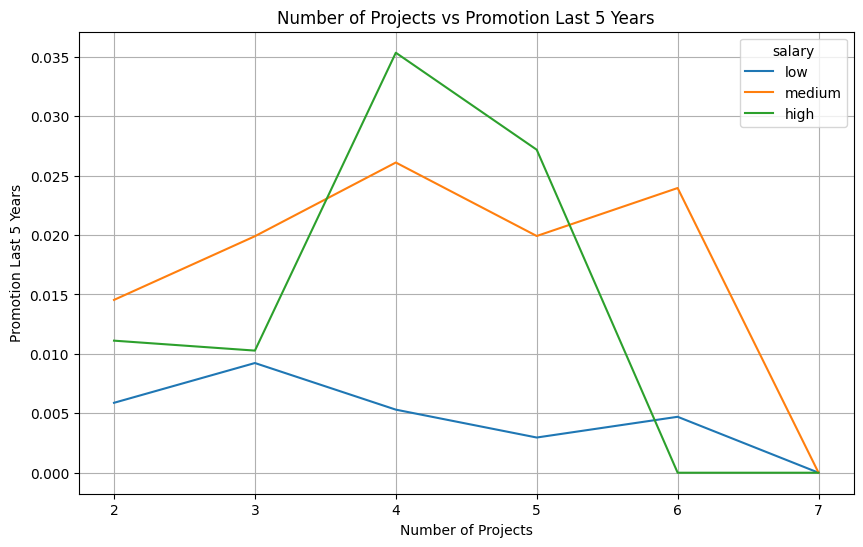

In [17]:
# number of projects vs promotion last 5years

plt.figure(figsize=(10,6))
sns.lineplot(data=working_df, x='number_project', y='promotion_last_5years', hue='salary', ci=None)
plt.title("Number of Projects vs Promotion Last 5 Years")
plt.xlabel("Number of Projects")
plt.ylabel("Promotion Last 5 Years")
plt.grid(True)
plt.show()

### **Feature Engineering**

In [18]:
display(working_df)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,quit,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0.0,sales,low
1,0.80,0.86,5,262,6,0,1,0.0,sales,medium
2,0.11,0.88,7,272,4,0,1,0.0,sales,medium
3,0.72,0.87,5,223,5,0,1,0.0,sales,low
4,0.37,0.52,2,159,3,0,1,0.0,sales,low
...,...,...,...,...,...,...,...,...,...,...
11576,0.97,0.51,5,215,7,0,0,0.0,management,high
11577,0.55,0.78,4,261,3,0,0,0.0,management,high
11578,0.76,0.56,5,222,10,0,0,0.0,management,high
11579,0.53,0.99,3,223,10,0,0,0.0,marketing,low


In [19]:
## Calculating the possibility of burnouts
# If we assume that the normal weekly hours are 40, then the average monthly hours for each employee is about 160 hours

working_df['projects_per_yr'] = working_df['number_project']/working_df['time_spend_company']
working_df['productivity_lvl'] = working_df['projects_per_yr']/(working_df['average_montly_hours']*12)
working_df['burnout_possibility'] = (((working_df['projects_per_yr']>5)|(working_df['average_montly_hours']>160))&(working_df['satisfaction_level']<0.6)).astype(int)

# ppy_count = working_df['projects_per_yr'].value_counts()
# pdt_lvl = working_df['productivity_lvl'].value_counts()
# bo_count = working_df['burnout_possibility'].value_counts()
# print(bo_count)
# print(pdt_lvl)
# print(ppy_count)

display(working_df)

C:\Users\Jasmine\AppData\Local\Temp\ipykernel_28532\771097212.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  working_df['projects_per_yr'] = working_df['number_project']/working_df['time_spend_company']
C:\Users\Jasmine\AppData\Local\Temp\ipykernel_28532\771097212.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  working_df['productivity_lvl'] = working_df['projects_per_yr']/(working_df['average_montly_hours']*12)
C:\Users\Jasmine\AppData\Local\Temp\ipykernel_28532\771097212.py:6: SettingWithCopyWarn

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,quit,promotion_last_5years,department,salary,projects_per_yr,productivity_lvl,burnout_possibility
0,0.38,0.53,2,157,3,0,1,0.0,sales,low,0.666667,0.000354,0
1,0.80,0.86,5,262,6,0,1,0.0,sales,medium,0.833333,0.000265,0
2,0.11,0.88,7,272,4,0,1,0.0,sales,medium,1.750000,0.000536,1
3,0.72,0.87,5,223,5,0,1,0.0,sales,low,1.000000,0.000374,0
4,0.37,0.52,2,159,3,0,1,0.0,sales,low,0.666667,0.000349,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11576,0.97,0.51,5,215,7,0,0,0.0,management,high,0.714286,0.000277,0
11577,0.55,0.78,4,261,3,0,0,0.0,management,high,1.333333,0.000426,1
11578,0.76,0.56,5,222,10,0,0,0.0,management,high,0.500000,0.000188,0
11579,0.53,0.99,3,223,10,0,0,0.0,marketing,low,0.300000,0.000112,1


In [20]:
display(working_df['burnout_possibility'].unique())

array([0, 1])

In [21]:
# performance lvl given the number of projects they are taking (assuming the projects taken on each year is constant)
# high score: able to produce quality work / perform well despite the heavier workload
# low score: unable to produce good work under high stress

working_df['performance_pressure'] = working_df['last_evaluation'] * working_df['projects_per_yr']

display(working_df)

C:\Users\Jasmine\AppData\Local\Temp\ipykernel_28532\961837054.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  working_df['performance_pressure'] = working_df['last_evaluation'] * working_df['projects_per_yr']


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,quit,promotion_last_5years,department,salary,projects_per_yr,productivity_lvl,burnout_possibility,performance_pressure
0,0.38,0.53,2,157,3,0,1,0.0,sales,low,0.666667,0.000354,0,0.353333
1,0.80,0.86,5,262,6,0,1,0.0,sales,medium,0.833333,0.000265,0,0.716667
2,0.11,0.88,7,272,4,0,1,0.0,sales,medium,1.750000,0.000536,1,1.540000
3,0.72,0.87,5,223,5,0,1,0.0,sales,low,1.000000,0.000374,0,0.870000
4,0.37,0.52,2,159,3,0,1,0.0,sales,low,0.666667,0.000349,0,0.346667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11576,0.97,0.51,5,215,7,0,0,0.0,management,high,0.714286,0.000277,0,0.364286
11577,0.55,0.78,4,261,3,0,0,0.0,management,high,1.333333,0.000426,1,1.040000
11578,0.76,0.56,5,222,10,0,0,0.0,management,high,0.500000,0.000188,0,0.280000
11579,0.53,0.99,3,223,10,0,0,0.0,marketing,low,0.300000,0.000112,1,0.297000


## **ML analysis**

### ***Data processing***

In [37]:
print(working_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 11581 entries, 0 to 11580
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11581 non-null  float64
 1   last_evaluation        11581 non-null  float64
 2   number_project         11581 non-null  int64  
 3   average_montly_hours   11581 non-null  int64  
 4   time_spend_company     11581 non-null  int64  
 5   Work_accident          11581 non-null  int64  
 6   quit                   11581 non-null  int64  
 7   promotion_last_5years  11581 non-null  float64
 8   department             11581 non-null  object 
 9   salary                 11581 non-null  object 
 10  projects_per_yr        11581 non-null  float64
 11  productivity_lvl       11581 non-null  float64
 12  burnout_possibility    11581 non-null  int32  
 13  performance_pressure   11581 non-null  float64
dtypes: float64(6), int32(1), int64(5), object(2)
memory usage: 

In [38]:
# OneHotEncode cat data

cat_var = working_df.select_dtypes(include=['object'])
num_var = working_df.select_dtypes(include=['int32','int64', 'float64']).drop(columns=['quit'])
y = working_df[['quit']]
print(num_var.columns)
print(cat_var.columns)

encoder = OneHotEncoder(sparse_output=False)
cat_data_ohe = encoder.fit_transform(cat_var)
cat_ohe_df = pd.DataFrame(cat_data_ohe, columns=encoder.get_feature_names_out(cat_var.columns))

ohe_df = pd.concat([num_var, cat_ohe_df], axis=1)
print(ohe_df.columns)

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'projects_per_yr', 'productivity_lvl',
       'burnout_possibility', 'performance_pressure'],
      dtype='object')
Index(['department', 'salary'], dtype='object')
Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'projects_per_yr', 'productivity_lvl',
       'burnout_possibility', 'performance_pressure', 'department_IT',
       'department_RandD', 'department_accounting', 'department_hr',
       'department_management', 'department_marketing',
       'department_product_mng', 'department_sales', 'department_support',
       'department_technical', 'salary_high', 'salary_low', 'salary_medium'],
      dtype='object')


In [39]:
# split data

X_train, X_test, y_train, y_test = train_test_split(ohe_df, y, test_size=0.2, train_size=0.8, random_state=42)

In [40]:
# scaling the dataframe

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [41]:
# picking the best fit features to select

lr = LogisticRegression()
rfe = RFE(lr, n_features_to_select=15)
rfe.fit(X_train_scaled, y_train)

X_train_selected = rfe.fit_transform(X_train_scaled, y_train)
X_test_selected = rfe.transform(X_test_scaled)



c:\Users\Jasmine\anaconda3\envs\python\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Jasmine\anaconda3\envs\python\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Jasmine\anaconda3\envs\python\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Jasmine\anaconda3\envs\python\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array w

In [26]:
print(working_df.columns[rfe.support_])

IndexError: boolean index did not match indexed array along dimension 0; dimension is 14 but corresponding boolean dimension is 23

## Logistic Regression

In [42]:
lr.fit(X_train_selected, y_train)
y_pred_lr = lr.predict(X_test_selected)

c:\Users\Jasmine\anaconda3\envs\python\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [43]:
# Cross validation
cv_scores = cross_val_score(lr, ohe_df, y, cv=5)

print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", np.mean(cv_scores))

c:\Users\Jasmine\anaconda3\envs\python\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Jasmine\anaconda3\envs\python\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Jasmine\anaconda3\envs\python\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

Cross-validation scores: [0.89296504 0.86226252 0.88557858 0.87867012 0.86787565]
Mean cross-validation score: 0.8774703829843695


c:\Users\Jasmine\anaconda3\envs\python\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Jasmine\anaconda3\envs\python\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Jasmine\anaconda3\envs\python\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED L

In [44]:
# evaluation1 of ML model

lr_acc = accuracy_score(y_test, y_pred_lr)
lr_mse = mean_squared_error(y_test, y_pred_lr)
lr_rs = r2_score(y_test, y_pred_lr)

print(f"Accuracy (LR): {lr_acc}")
print(f"Mean Squared Error (LR): {lr_mse}")
print(f"R-squared (LR): {lr_rs}")

Accuracy (LR): 0.9175658178679327
Mean Squared Error (LR): 0.08243418213206732
R-squared (LR): 0.4403919495811921


In [45]:
# evaluation2 of ML model

lr_matrix = confusion_matrix(y_test, y_pred_lr)
lr_report = classification_report(y_test, y_pred_lr)
lr_auc = roc_auc_score(y_test, y_pred_lr)

print(f"LR AUC Score: {lr_auc}")
print("Confusion Matrix:")
print(lr_matrix)
print(f"\nClassification Report:")
print(lr_report)

LR AUC Score: 0.8192556802087969
Confusion Matrix:
[[1849   52]
 [ 139  277]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1901
           1       0.84      0.67      0.74       416

    accuracy                           0.92      2317
   macro avg       0.89      0.82      0.85      2317
weighted avg       0.91      0.92      0.91      2317



The model produces a high accuracy of about 0.89 and a low mean-squared error of 0.10. However, the lower R2 value of 0.31 and AUC score of 0.78 indicate that while the model has some predictive power,it is still lacking in explaining the variability in the data and in class separation.


As we delve deeper into analysing the classification report, the model is able to identify employees who did not quit, but struggles with those who quit. One reason for this could be due to the imbalanced dataset, where there are a lot more of emmployees who retained in the company instead of leavving. This is supported by a precision of 0.78 and a recall of 0.60 for the 'quit' class, resulting in a moderate F1-score of 0.68. This suggests that the model is more conservative in predicting employee attrition and may be missing a significant number of actual quitters.

After the performance of some feature engineering to include features such as 'burnout_possibility' as well as 'performance_pressure', this s not only increased the performance scores of accuracy (to 0.91), R2 value (to 0.44) and the respective f1 scores (0: 0.95, 1: 0.74), but also reduced the MSE to 0.08. This showcases the improvement in model performance with the inclusion of these 2 features, especially 'burnout_possibility'.

## Random Forest

In [46]:
rfc_model = RandomForestClassifier(n_estimators=100, random_state=42)
rfc_model.fit(X_train_selected, y_train)
y_pred_rf = rfc_model.predict(X_test_selected)

c:\Users\Jasmine\anaconda3\envs\python\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [47]:
# evaluation

rfc_acc = accuracy_score(y_test, y_pred_rf)
rfc_mse = mean_squared_error(y_test, y_pred_rf)
rfc_r2 = r2_score(y_test, y_pred_rf)
rfc_matrix = confusion_matrix(y_test, y_pred_rf)
rfc_report = classification_report(y_test, y_pred_rf)
rfc_auc = roc_auc_score(y_test, y_pred_rf)

print(f"Accuracy (RF): {rfc_acc}")
print(f"Mean Squared Error (RF): {rfc_mse}")
print(f"R2 value: {rfc_r2}")
print(f"AUC Score (RF): {rfc_auc}")

print("\nConfusion Matrix:")
print(rfc_matrix)
print(f"\nClassification Report:")
print(rfc_report)

Accuracy (RF): 0.9797151488994389
Mean Squared Error (RF): 0.02028485110056107
R2 value: 0.862295401205843
AUC Score (RF): 0.9519597479059605

Confusion Matrix:
[[1892    9]
 [  38  378]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1901
           1       0.98      0.91      0.94       416

    accuracy                           0.98      2317
   macro avg       0.98      0.95      0.96      2317
weighted avg       0.98      0.98      0.98      2317



The model produces a high accuracy of about 0.97 and a low mean-squared error of 0.02. Coupled with a high R2 value of 0.86 and a high AUC score of 0.95.

As we delve deeper into analysing the classification report, the model is able to identify both employees who did not quit, and those who did. Despite the dataset being relatively imbalanced, where there are a lot more of emmployees who retained in the company instead of leaving, the model is still able to correctly classify 91% of candidates who quit, and 0.98% of candidates who retained.

Model's precision, recall and f1-score show an improvement with the inclusion of both features 'burnout_possibility' and 'performance_pressure'.

## Decision Tree

In [48]:
dtc_model = DecisionTreeClassifier()
dtc_model.fit(X_train_selected, y_train)
y_pred_dtc = dtc_model.predict(X_test_selected)

In [49]:
# evaluation of decision tree classifier

dtc_acc = accuracy_score(y_pred_dtc, y_test)
dtc_mse = mean_squared_error(y_pred_dtc, y_test)
dtc_r2 = r2_score(y_pred_dtc, y_test)

dtc_auc = roc_auc_score(y_pred_dtc, y_test)
dtc_matrix = confusion_matrix(y_pred_dtc, y_test)
dtc_report = classification_report(y_pred_dtc, y_test)

print(f"Accuracy (DTC): {dtc_acc}")
print(f"Mean Squared Error (DTC): {dtc_mse}")
print(f"R2 value (DTC): {dtc_r2}")
print(f"AUC Score (DTC): {dtc_auc}")

print("\nConfusion Matrix:")
print(dtc_matrix)
print(f"\nClassification Report:")
print(dtc_report)

Accuracy (DTC): 0.9637462235649547
Mean Squared Error (DTC): 0.03625377643504532
R2 value (DTC): 0.7566206905175755
AUC Score (DTC): 0.9363922269879579

Confusion Matrix:
[[1856   39]
 [  45  377]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1895
           1       0.91      0.89      0.90       422

    accuracy                           0.96      2317
   macro avg       0.94      0.94      0.94      2317
weighted avg       0.96      0.96      0.96      2317



The model produces a high accuracy of about 0.98 and a low mean-squared error of 0.03. Coupled with a relatively high R2 value of 0.76 and a high AUC score of 0.93.

As we delve deeper into analysing the classification report, the model is able to identify both employees who did not quit, and those who did. Despite the dataset being relatively imbalanced, where there are a lot more of emmployees who retained in the company instead of leaving, the model is still able to correctly classify 89% of candidates who quit, and 98% of candidates who retained.

Of the 3 models, the Randomm Forest model, despite being slightly (by 1%) less accurate as compared to the Decision Tree model, it also has a slightly higher AUC score by 0.02, a high precision score of 98% and a higher recall of 91%. This suggests that not only was the Random Forest model able to accurately classify employees who did not quit with a high precision, it is also able to classify employees who did quit despite the imbalanced dataset. As such, for datasets such as these a Random Forest model is preferred as compared to other models.

## **Incomplete actions**

c:\Users\Jasmine\anaconda3\envs\python\lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
c:\Users\Jasmine\anaconda3\envs\python\lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
c:\Users\Jasmine\anaconda3\envs\python\lib\site-packages\seaborn\axisgrid.py:186: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  figlegend = self._figure.legend(handles, labels, **kwargs)


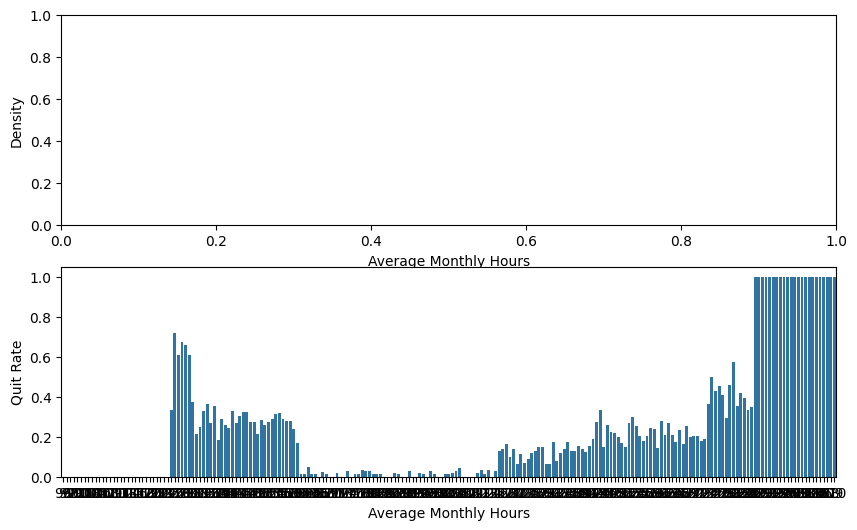

<Figure size 418.25x300 with 0 Axes>

In [76]:
#not sure what's wrong

def plotQuit():
  facet_grid = sns.FacetGrid(working_df, hue='quit')
  facet_grid.map(sns.kdeplot, 'average_montly_hours', shade=True, ax=axes[0]).add_legend(labels=['Quit True', 'Quit False'])  # Add label here
  axes[0].set(xlabel='Average Monthly Hours', ylabel='Density')

  avg = working_df[['average_montly_hours', 'quit']].groupby(['average_montly_hours'], as_index=False).mean()
  sns.barplot(x='average_montly_hours', y='quit',data=avg, ax=axes[1])
  axes[1].set(xlabel='Average Monthly Hours', ylabel='Quit Rate')

  plt.clf()

fig_hrs, axes = plt.subplots(nrows=2, ncols=1, figsize=(10,6))
plotQuit()